#### Loading Libraries for this Analysis


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [66]:
#Reading Files

data=pd.read_csv(r'C:\Users\luise\OneDrive\Documentos\GitHub\Google_Store_Analysis\googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [68]:
#Dealing with missing values
total=data.isna().sum().sort_values(ascending=False)
percent=(data.isna().sum()/data.isna().sum().sum())
missing_data=pd.concat((total,percent),axis=1,keys={'Missing','Percent'})
print(missing_data)

                Percent   Missing
Rating             1474  0.991258
Current Ver           8  0.005380
Android Ver           3  0.002017
Type                  1  0.000672
Content Rating        1  0.000672
App                   0  0.000000
Category              0  0.000000
Reviews               0  0.000000
Size                  0  0.000000
Installs              0  0.000000
Price                 0  0.000000
Genres                0  0.000000
Last Updated          0  0.000000


In [69]:
#Get rid of missing ratings since it won't use our purpose.

data.dropna(how='any',inplace=True)
print(data.shape)


(9360, 13)


After remove missing data,our data contain 9,360 records with 13 fields

In [70]:
data.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

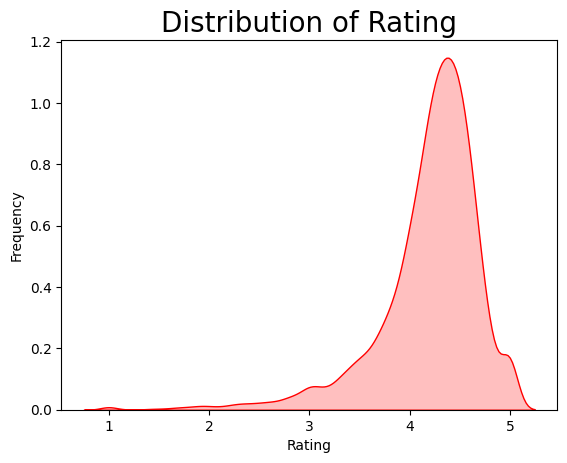

In [71]:
g = sns.kdeplot(data.Rating, color="Red", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
rating_mean=data.Rating.mean()




In [72]:
print('The mean for the rating is:',rating_mean)

The mean for the rating is: 4.191837606837606


In [73]:

print(len(data['Category'].unique()),'categories')

33 categories


In [74]:
data['Category'].value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of app in each category')

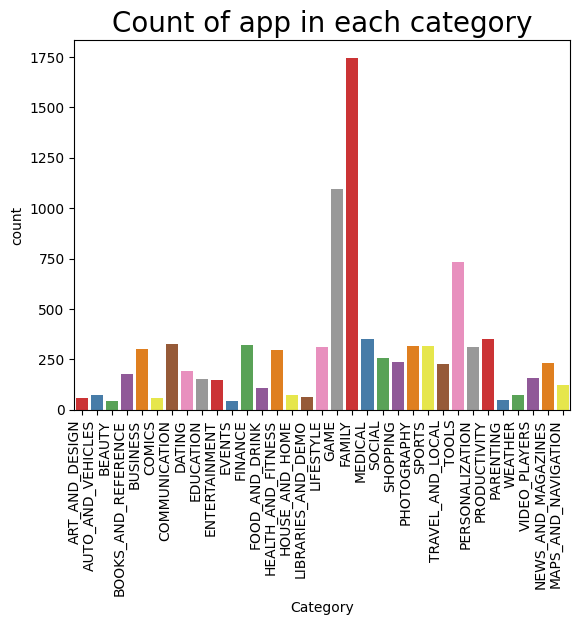

In [75]:
g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90,ha='right')
g 
plt.title('Count of app in each category',size = 20)

### Finding
We can see that Game and Family categories have the most appearances for application in store

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

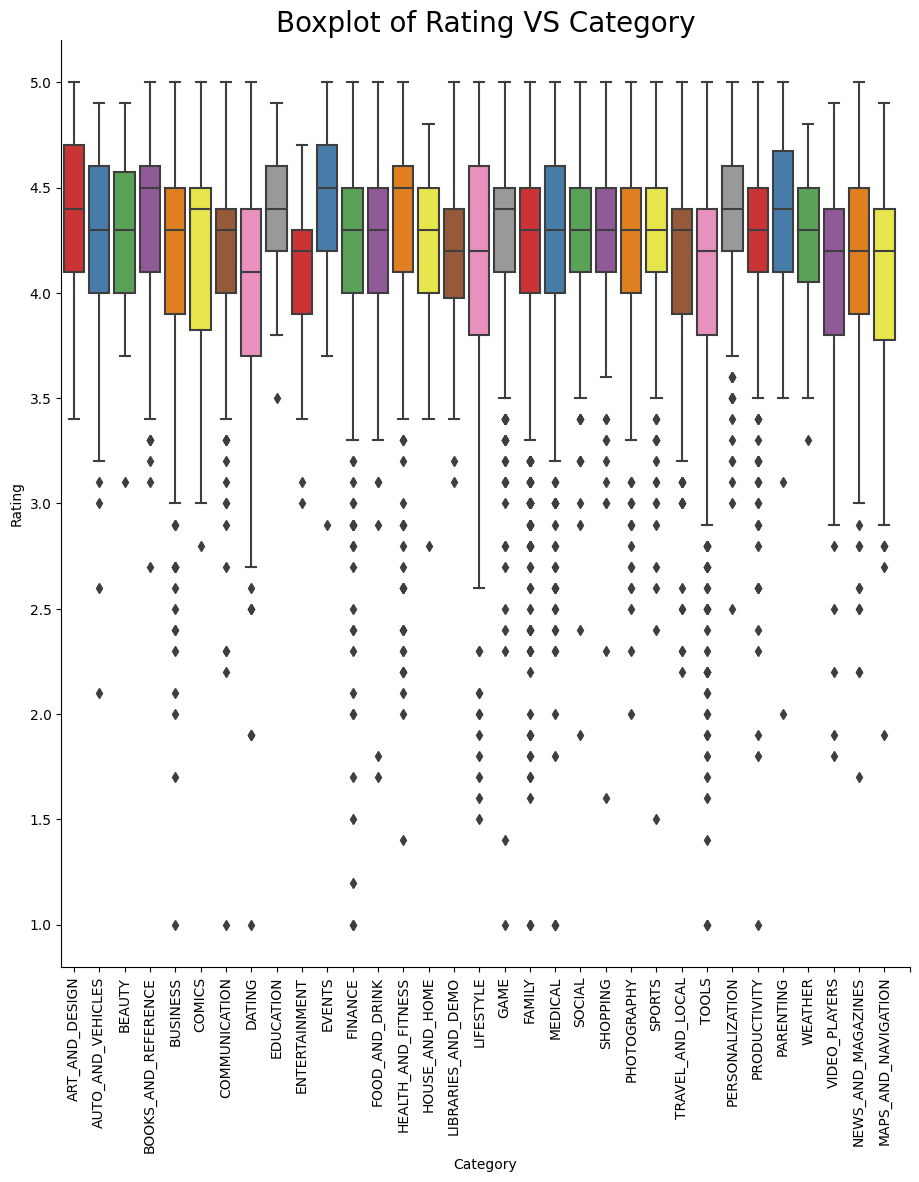

In [76]:
g = sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10 ,
palette = "Set1")
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Rating of each cateogry are alike.

### Reviews

In [77]:
data.Reviews.head()

#This data still an object we need to convert to int64

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [78]:
data.Reviews=pd.to_numeric(data.Reviews)

In [79]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

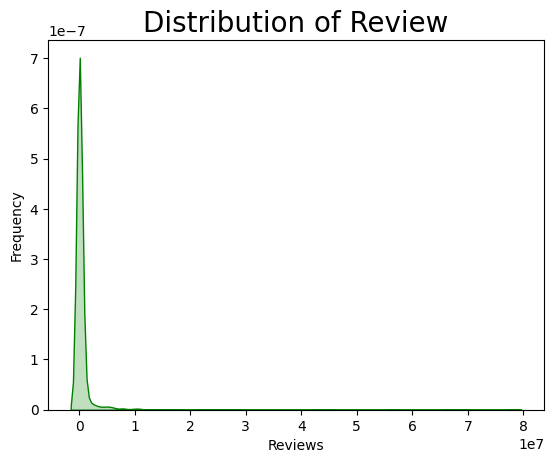

In [80]:
g = sns.kdeplot(data.Reviews, color="Green", fill = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review',size = 20)
rating_mean=data.Rating.mean()

Most of application in this store have less than 1M in reviews. Obviously, well-known applictions have a lot of reviews

Text(0.5, 1.0, 'Rating VS Reveiws')

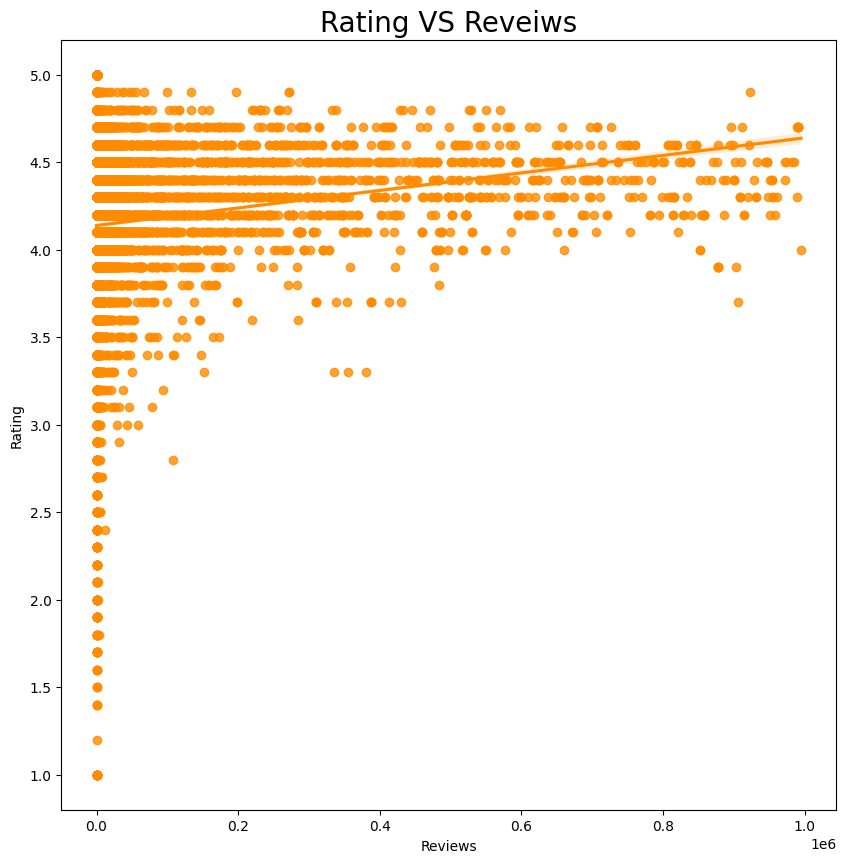

In [81]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

Seems like well-known application will get a good rating

### Size

In [82]:
data['Size'].head()
#We can see that this column is an object type and contain the metric symbol for the perefix,

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [83]:
len(data[data.Size == 'Varies with device'])

1637

In [84]:
data['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [85]:
#Changing K or M for 1000 or a million.

data.Size = (data.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             data.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [87]:
#fill "Varies with device" with mean of size in each category

data['Size'].fillna(data.groupby('Category')['Size'].transform('mean'),inplace = True)

### Installs

In [89]:
#Data still in object type, and contain the plus sign
data['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

#### NOTE
I encode it by order of size;
ex: 
* 0 refer to 1+
* 1 refer to 5+
* 2 refer  to 10+
* ETC.

In [90]:
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.apply(lambda x: x.replace('+',''))
data.Installs = data.Installs.apply(lambda x: int(x))

In [91]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [92]:
Sorted_value = sorted(list(data['Installs'].unique()))

In [93]:
data['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [94]:
data['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

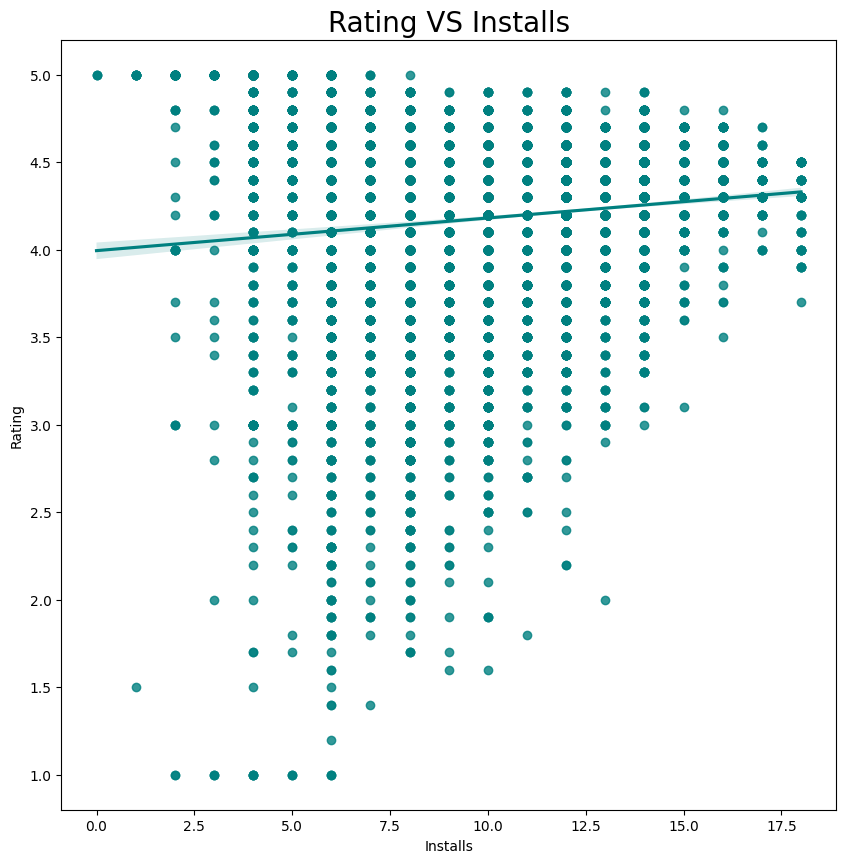

In [95]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=data);
plt.title('Rating VS Installs',size = 20)